<a href="https://colab.research.google.com/github/yfb2022/STAT_DL_INTRO/blob/main/6_1_using_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

'2.15.0'

# Using word embeddings

벡터를 단어와 연관시키는 또 다른 인기 있고 강력한 방법은 "단어 임베딩"이라고도 하는 Dense한 "단어 벡터"를 사용하는 것.

원-핫 인코딩을 통해 얻은 벡터는 이진, 희소(대부분 0으로 구성) 및 매우 고차원(어휘의 단어 수와 동일한 차원)인 반면, "단어 임베딩"은 저차원 부동 소수점 벡터(예: 희소 벡터와 반대되는 "조밀한" 벡터). 원-핫 인코딩을 통해 얻은 단어 벡터와 달리 단어 임베딩은 데이터에서 학습됩니다.

매우 큰 어휘를 다룰 때 256차원, 512차원 또는 1024차원의 단어 임베딩을 보는 것이 일반적입니다. 반면, 원-핫 인코딩 단어는 일반적으로 20,000차원 이상의 벡터로 이어집니다(이 경우 20,000개의 토큰 어휘를 캡처).

따라서 단어 임베딩은 더 많은 정보를 훨씬 더 적은 차원에 담습니다.

![word embeddings vs. one hot encoding](https://s3.amazonaws.com/book.keras.io/img/ch6/word_embeddings.png)

단어 임베딩을 얻는 방법에는 두 가지가 있습니다.

1) 관심 있는 주요 작업에 맞는 단어 임베딩 학습

2) 해결하려는 작업과 다른 미리 계산된 모델 단어 임베딩을 로드

## Learning word embeddings with the `Embedding` layer

밀집된 벡터를 단어에 연결하는 가장 간단한 방법은 벡터를 무작위로 선택하는 것.

이 접근 방식의 문제점은 결과 임베딩 공간에 구조가 없다는 것입니다. 예를 들어 "exact"과 "accurate"이라는 단어는 대부분의 문장에서 서로 바꿔 사용할 수 있음에도 불구하고 완전히 다른 임베딩으로 끝날 수 있음.

좀 더 추상적으로 말하자면, 단어 벡터 사이의 기하학적 관계는 이러한 단어 사이의 의미론적 관계를 반영해야 함.

단어 임베딩은 인간의 언어를 기하학적 공간에 매핑하는 것을 의미.

예를 들어, 합리적인 임베딩 공간에서는 동의어가 유사한 단어 벡터에 임베드될 것으로 예상하고 일반적으로 두 단어 벡터 사이의 기하학적 거리(예: L2 거리)가 연관된 단어의 의미론적 거리와 관련될 것으로 예상. (매우 다른 것을 의미하는 단어는 서로 멀리 있는 지점에 삽입되고 관련 단어는 더 가까워집니다). 단순한 거리를 넘어서도 임베딩 공간의 특정 방향이 의미 있기를 원할 수 있습니다.

실제 단어 임베딩 공간에서 의미 있는 기하학적 변환의 일반적인 예는 "성별 벡터"와 "복수형 벡터"입니다. 예를 들어, 벡터 "king"에 "female 벡터"를 추가하면 벡터 "queen"을 얻을 수 있습니다. "복수형 벡터"를 추가하면 "kings"을 얻을 수 있습니다. 단어 임베딩 공간에는 일반적으로 해석 가능하고 잠재적으로 유용한 수천 개의 벡터가 있습니다.

인간 언어를 완벽하게 매핑하고 자연어 처리 작업에 사용할 수 있는 "이상적인" 단어 임베딩 공간이 있습니까? 그럴 수도 있지만 어쨌든 우리는 아직 그런 종류의 것을 계산하지 않았습니다.

새로운 작업마다 새로운 임베딩 공간을 배우는 것이 합리적입니다 . 다행스럽게도 역전파를 사용하면 이 작업이 쉬워지고 Keras를 사용하면 훨씬 더 쉬워집니다. 'Embedding'을 사용하여 레이어의 가중치를 학습하는 것입니다.

In [ ]:
from keras.layers import Embedding
# library(keras)

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
# embedding_layer <- layer_embedding(input_dim = 1000, output_dim = 64)

layer_embedding(), Embedding은 정수 인덱스(특정 단어를 나타냄)를 밀집된 벡터에 매핑하는 사전으로 가장 잘 이해됩니다. 정수를 입력으로 사용하고, 내부 사전에서 이러한 정수를 찾아 관련 벡터를 반환합니다. 이는 사실상 사전 조회입니다

임베딩 레이어는 (samples, sequence_length) 모양의 정수로 구성된 2D 텐서를 입력으로 사용함. 여기서 각 항목은 정수 시퀀스이며 가변 길이의 시퀀스를 임베드할 수 있음.

예를 들어 이전 예제 배치에서 모양 (32, 10)(길이가 10인 32개의 시퀀스 배치) 또는 (64, 15)(길이가 15인 64개 시퀀스의 배치) 를 임베딩 레이어에 공급할 수 있습니다. 하지만 배치의 모든 시퀀스는 길이가 동일해야 합니다(단일 텐서로 압축해야 하기 때문). 따라서 다른 시퀀스보다 짧은 시퀀스는 0으로 채워야 하고, 더 긴 시퀀스는 잘라야 합니다.

이 레이어는 (samples, sequence_length, embedding_dimensionality) 모양의 3D 부동 소수점 텐서를 반환합니다. 이러한 3D 텐서는 RNN 레이어 또는 1D 컨볼루션 레이어에 의해 처리될 수 있습니다

임베딩 레이어를 인스턴스화하면 해당 가중치(토큰 벡터의 내부 사전)는 다른 레이어와 마찬가지로 처음에는 무작위입니다. 훈련 중에 이러한 단어 벡터는 역전파를 통해 점진적으로 조정되어 공간을 다운스트림 모델이 활용할 수 있는 것으로 구조화합니다. 완전히 학습되면 임베딩 공간에는 모델을 학습하는 특정 문제에 특화된 일종의 구조인 많은 구조가 표시됩니다.

이 아이디어를 이미 익숙한 IMDB 영화 리뷰 감정 예측 작업에 적용해 보겠습니다. 먼저 데이터를 신속하게 준비합니다. 영화 리뷰를 가장 일반적인 상위 10,000개 단어로 제한하고(이 데이터 세트를 처음 사용할 때와 마찬가지로) 리뷰를 20단어로 제한합니다. 네트워크는 10,000개의 단어 각각에 대해 8차원 임베딩을 학습하고, 입력 정수 시퀀스(2D 정수 텐서)를 임베디드 시퀀스(3D 부동 텐서)로 변환하고, 텐서를 2D로 평탄화하고, 분류를 위해 맨 위에 단일 밀집 레이어를 훈련합니다.



In [3]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000

# Cut texts after this number of words
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6668 - acc: 0.6308 - val_loss: 0.6131 - val_acc: 0.6978
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5371 - acc: 0.7520 - val_loss: 0.5234 - val_acc: 0.7338
Epoch 3/10
625/625

우리는 ~75%의 검증 정확도를 얻었는데, 이는 각 리뷰에서 20단어만 본다는 점을 고려하면 꽤 좋은 수치입니다.

그러나 단순히 포함된 시퀀스를 평면화하고 그 위에 단일 밀집 레이어를 훈련하는 것은 단어 간 관계와 문장 구조를 고려하지 않고 입력 시퀀스의 각 단어를 별도로 처리하는 모델로 이어진다.

각 시퀀스를 전체적으로 고려하는 기능을 학습하려면 임베디드 시퀀스 위에 RNN 레이어나 1D CONV 레이어를 추가하는 것이 좋음

## Using pre-trained word embeddings

사용 가능한 훈련 데이터가 너무 적어서 데이터를 단독으로 사용하여 어휘의 적절한 작업별 임베딩을 학습할 수 없는 경우도 존재.

자연어 처리에서 사전 훈련된 단어 임베딩을 사용하는 이유는 이미지 분류에서 사전 훈련된 컨브넷을 사용하는 것과 매우 유사합니다.충분하지 않은 데이터에서 일반성을 강화하기 위해 다른 문제에서 학습한 임베딩을 재사용.

이러한 단어 임베딩은 일반적으로 단어 발생 통계(문장이나 문서에서 어떤 단어가 함께 발생하는지에 대한 관찰)를 사용하여 계산되며, 일부는 신경망을 포함하고 다른 일부는 그렇지 않습니다.

"Word2Vec" : 감독되지 않은 방식으로 계산된 단어에 대한 조밀하고 저차원 임베딩 공간에 대한 아이디어

“GloVe”:“Global Vector for Word Representation”단어 동시 발생 통계 행렬을 인수분해하는 것에 기반한 임베딩 기술. 개발자는 Wikipedia 데이터 또는 Common Crawl 데이터에서 얻은 수백만 개의 영어 토큰에 대해 사전 계산된 임베딩을 제공.

## Putting it all together: from raw text to word embeddings

일련의 벡터에 문장을 삽입하고 이를 Flatten한 다음 그 위에 Dense 레이어를 학습

사전 훈련된 단어 임베딩을 사용하여 이를 수행

### Download the IMDB data as raw text


First, head to `http://ai.stanford.edu/~amaas/data/sentiment/` and download the raw IMDB dataset (if the URL isn't working anymore, just
Google "IMDB dataset"). Uncompress it.

Now let's collect "the individual training reviews into a list of strings", "one string per review, and let's also collect the review labels
(positive / negative)" into a `labels` list:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# prompt: unzip '/content/drive/MyDrive/aclImdb_v1.tar.gz' using linux
!tar -xzf /content/drive/MyDrive/aclImdb_v1.tar.gz

In [17]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
# labels <- c()
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

# for (label_type in c("neg", "pos")) {
#     label <- switch(label_type, neg = 0, pos = 1)
#     dir_name <- file.path(train_dir, label_type)
#     for (fname in list.files(dir_name, pattern = glob2rx(".txt"),
#                              full.names = True)) {
#                                  texts <- c(texts, readChar(fname, file.info(fname)$size))
#                                  labels <- c(labels, label)
#                              }
# }

### Tokenize the data

수집한 텍스트를 벡터화하고 학습 및 검증 분할을 준비하겠습니다.

사전 훈련된 단어 임베딩은 훈련 데이터가 거의 없는 문제에 특히 유용하기 때문에 (그렇지 않으면 작업별 임베딩이 더 나은 성능을 발휘할 가능성이 높음) 다음과 같은 변형을 추가. 우선 훈련 데이터를 처음 200개로 제한합니다.


In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# tokenizer <- text_tokenizer(num_words = max_words) %>%
#   fit_text_tokenizer(texts)
# sequences <- texts_to_sequences(tokenizer, texts)

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
# random_indices
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


### Download the GloVe word embeddings


Head to `https://nlp.stanford.edu/projects/glove/` (where you can learn more about the GloVe algorithm), and download the pre-computed
embeddings from 2014 English Wikipedia. It's a 822MB zip file named `glove.6B.zip`, containing 100-dimensional embedding vectors for
400,000 words (or non-word tokens). Un-zip it.

### Pre-process the embeddings

Build an index mapping words (as strings) to their vector representation (as number
vectors).

In [19]:
!unzip -o /content/drive/MyDrive/glove.6B.zip

Archive:  /content/drive/MyDrive/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [20]:
glove_dir = '/content/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


임베딩 레이어에 로드할 수 있는 임베딩 행렬

각 항목 i 에는 참조 단어 인덱스의 embedding_dim와 인덱스 i 단어에 대한 차원 벡터가 포함되어 있는 (max_words, embedding_dim) 모양의 행렬.

인덱스 0은 단어나 토큰을 나타내지 않는 자리 표시자.

In [21]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
# embedding_matrix <- array(0, c(max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

# for (word in names(word_index)){
#     index <- word_index[[word]]
#     if (index < max_words) {
#         embedding_vector <- embedding_index[[word]]
#         if (!is.null(embedding_vector))
#            embedding_matrix[index+1,] <- embedding_vector
#     }
# }

### Define a model

We will be using the same model architecture as before:

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# model <- keras_model_sequential() %>%
#   layer_embedding(input_dim = max_words, output_dim = embedding_dim) %>%
#   layer_flatten() %>%
#   layer_dense(units = 32, activation = 'relu') %>%
#   layer_dense(units = 1, activation = 'sigmoid')
# summary(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 1320065 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Load the GloVe embeddings in the model

임베딩 레이어에는 단일 가중치 행렬, ​​즉 각 항목 i 가 인덱스 i 와 연관되는 단어 벡터인 2D 부동 행렬이 있습니다 . 모델의 첫 번째 레이어인 임베딩 레이어에 준비한 GloVe 매트릭스를 로드.

In [24]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# get_layer(model, index = 1) %>%
#   set_weights(list(embedding_matrix)) %>%
#   freeze_weights()

또한 사전 학습된 컨브넷 기능의 맥락에서 이미 익숙한 것과 동일한 근거에 따라 임베딩 레이어의 가중치를 고정합니다.

모델의 일부가 사전 학습되고(임베딩 레이어와 같은) 일부가 무작위로 초기화되는 경우(분류기와 마찬가지로) 사전 훈련된 부분은 이미 알고 있는 내용을 잊어버리지 않도록 훈련 중에 업데이트해서는 안 됩니다. 무작위로 초기화된 레이어에 의해 트리거되는 대규모 그래디언트 업데이트는 이미 학습된 기능을 방해합니다.

### Train and evaluate

Let's compile our model and train it:

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 142ms/step - loss: 2.2695 - acc: 0.5250 - val_loss: 1.3040 - val_acc: 0.5045
Epoch 2/10
7/7 [==============================] - 1s 220ms/step - loss: 0.5105 - acc: 0.7650 - val_loss: 0.6892 - val_acc: 0.5759
Epoch 3/10
7/7 [==============================] - 1s 235ms/step - loss: 0.4010 - acc: 0.7800 - val_loss: 2.8258 - val_acc: 0.5044
Epoch 4/10
7/7 [==============================] - 1s 109ms/step - loss: 0.2968 - acc: 0.9350 - val_loss: 0.8216 - val_acc: 0.5515
Epoch 5/10
7/7 [==============================] - 1s 219ms/step - loss: 0.1411 - acc: 0.9650 - val_loss: 0.8835 - val_acc: 0.5432
Epoch 6/10
7/7 [==============================] - 1s 113ms/step - loss: 0.0413 - acc: 1.0000 - val_loss: 0.7608 - val_acc: 0.5887
Epoch 7/10
7/7 [==============================] - 1s 114ms/step - loss: 0.0290 - acc: 1.0000 - val_loss: 2.8791 - val_acc: 0.4962
Epoch 8/10
7/7 [==============================] - 1s 221ms/step - loss: 0.8539 - acc: 0.82

Let's plot its performance over time:

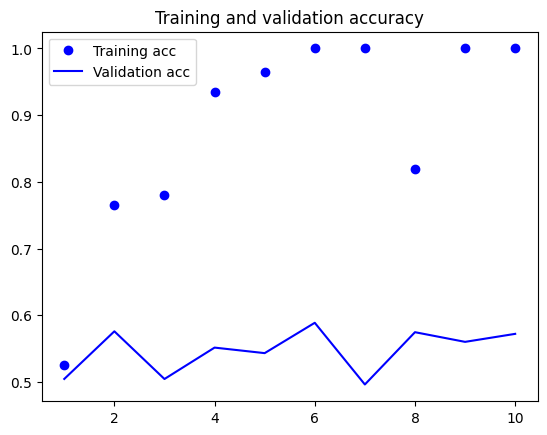

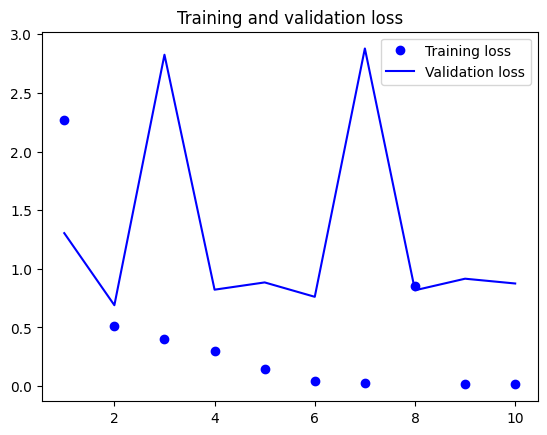

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

훈련 샘플 수가 적기 때문에 모델은 빠르게 과적합을 시작합니다.

훈련 샘플이 너무 적기 때문에 성능은 우리가 정확히 200개의 샘플을 선택하고 무작위로 선택했는지에 따라 크게 달라집니다.

사전 훈련된 단어 임베딩을 로드하지 않고 임베딩 레이어를 동결하지 않고 동일한 모델을 훈련할 수도 있습니다. 이 경우, 우리는 입력 토큰의 작업별 임베딩을 학습하게 되며, 이는 일반적으로 많은 데이터를 사용할 수 있을 때 사전 훈련된 단어 임베딩보다 더 강력합니다



In [27]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 1320065 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 3s 279ms/step - loss: 0.6895 - acc: 0.5800 - val_loss: 0.6917 - val_acc: 0.5134
Epoch 2/10
7/7 [==

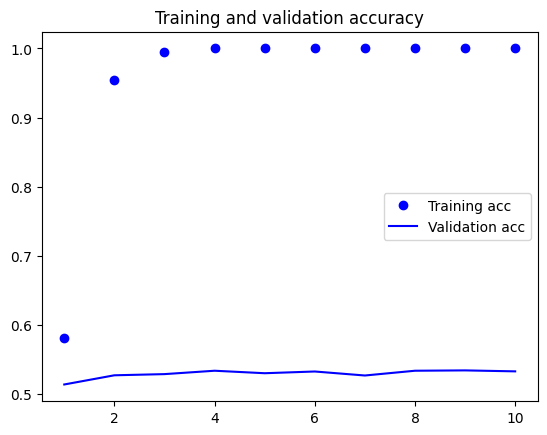

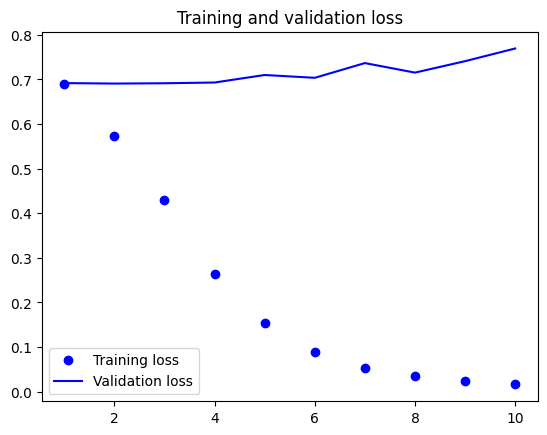

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Validation accuracy stalls in the low 50s. So in our case, pre-trained word embeddings does outperform jointly learned embeddings. If you
increase the number of training samples, this will quickly stop being the case -- try it as an exercise.

Finally, let's evaluate the model on the test data. First, we will need to tokenize the test data:

In [29]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

And let's load and evaluate the first model:

In [30]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.8933 - acc: 0.5624


[0.8933270573616028, 0.5623599886894226]

We get an appalling test accuracy of 54%. Working with just a handful of training samples is hard!